In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from missingno import matrix as mm
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../../data/amsc.csv')
house = pd.read_csv('../../data/train.csv')

In [3]:
data.head(5)

,RT,SERIALNO,SPORDER,PUMA,ST,ADJUST,PWGTP,AGEP,CIT,COW,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,186,1,700,16,1015675,89,43,1,7.0,...,82,27,92,150,28,78,25,99,159,129
1,P,186,2,700,16,1015675,92,42,1,4.0,...,84,26,90,159,30,87,27,98,167,131
2,P,186,3,700,16,1015675,107,16,1,1.0,...,90,28,92,177,33,105,30,104,206,156
3,P,186,4,700,16,1015675,91,14,1,NaN,...,81,28,94,164,29,88,27,104,156,138
4,P,306,1,700,16,1015675,309,29,1,5.0,...,294,400,80,489,340,491,612,282,462,259


In [4]:
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Columns: 239 entries, RT to pwgtp80
dtypes: float64(74), int64(162), object(3)
memory usage: 27.2+ MB


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
masked_data = data.isna()
masked_house = house.isna()

In [8]:
masked_data.sum().sort_values(ascending=False)

GCM       14827
GCR       14724
SFR       14702
SFN       14702
DECADE    14122
          ...  
FWAGP         0
FSSP          0
FSSIP         0
FSEXP         0
RT            0
Length: 239, dtype: int64

In [9]:
masked_house.sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [10]:
# nominal data
data_nom = data.select_dtypes(include=np.object)
house_nom = house.select_dtypes(include=np.object)

In [11]:
data_nom

,RT,NAICSP,SOCP
0,P,5617Z,371011
1,P,611M1,253000
2,P,722Z,352010
3,P,NaN,NaN
4,P,928P,493011
...,...,...,...
14926,P,722Z,352010
14927,P,6231,311010
14928,P,4244,537061
14929,P,722Z,353022


In [12]:
house_nom

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
house_nom.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
# convert nominal data into relative scale
# with 1 to n numbers
house_nom['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [15]:
house_nom['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [16]:
# RL -> 1, RM -> 2, FV -> 3, RH -> 4, C (all) -> 5
replacer = {'RL':1,'RM':2,'FV':3,'RH':4,'C (all)':5}
house['MSZoning'].replace(replacer,inplace=True)

In [17]:
house['MSZoning']

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: MSZoning, Length: 1460, dtype: int64

In [18]:
# ordinal data
house_nom['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [19]:
# convert ordinal data into relative data
# Gtl -> 0, Mod -> 1, Sev -> 2
house_nom['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [20]:
replacer = {'Gtl':0,'Mod':1,'Sev':2}
house['LandSlope'].replace(replacer,inplace=True)

In [21]:
house['LandSlope']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LandSlope, Length: 1460, dtype: int64

In [22]:
# convert quantitative data into nominal or ordinal
price_levels = pd.cut(x=house['SalePrice'],bins=5,labels=['very low','low','medium','high','very high'])
price_levels

0            low
1            low
2            low
3       very low
4            low
          ...   
1455    very low
1456         low
1457         low
1458    very low
1459    very low
Name: SalePrice, Length: 1460, dtype: category
Categories (5, object): ['very low' < 'low' < 'medium' < 'high' < 'very high']

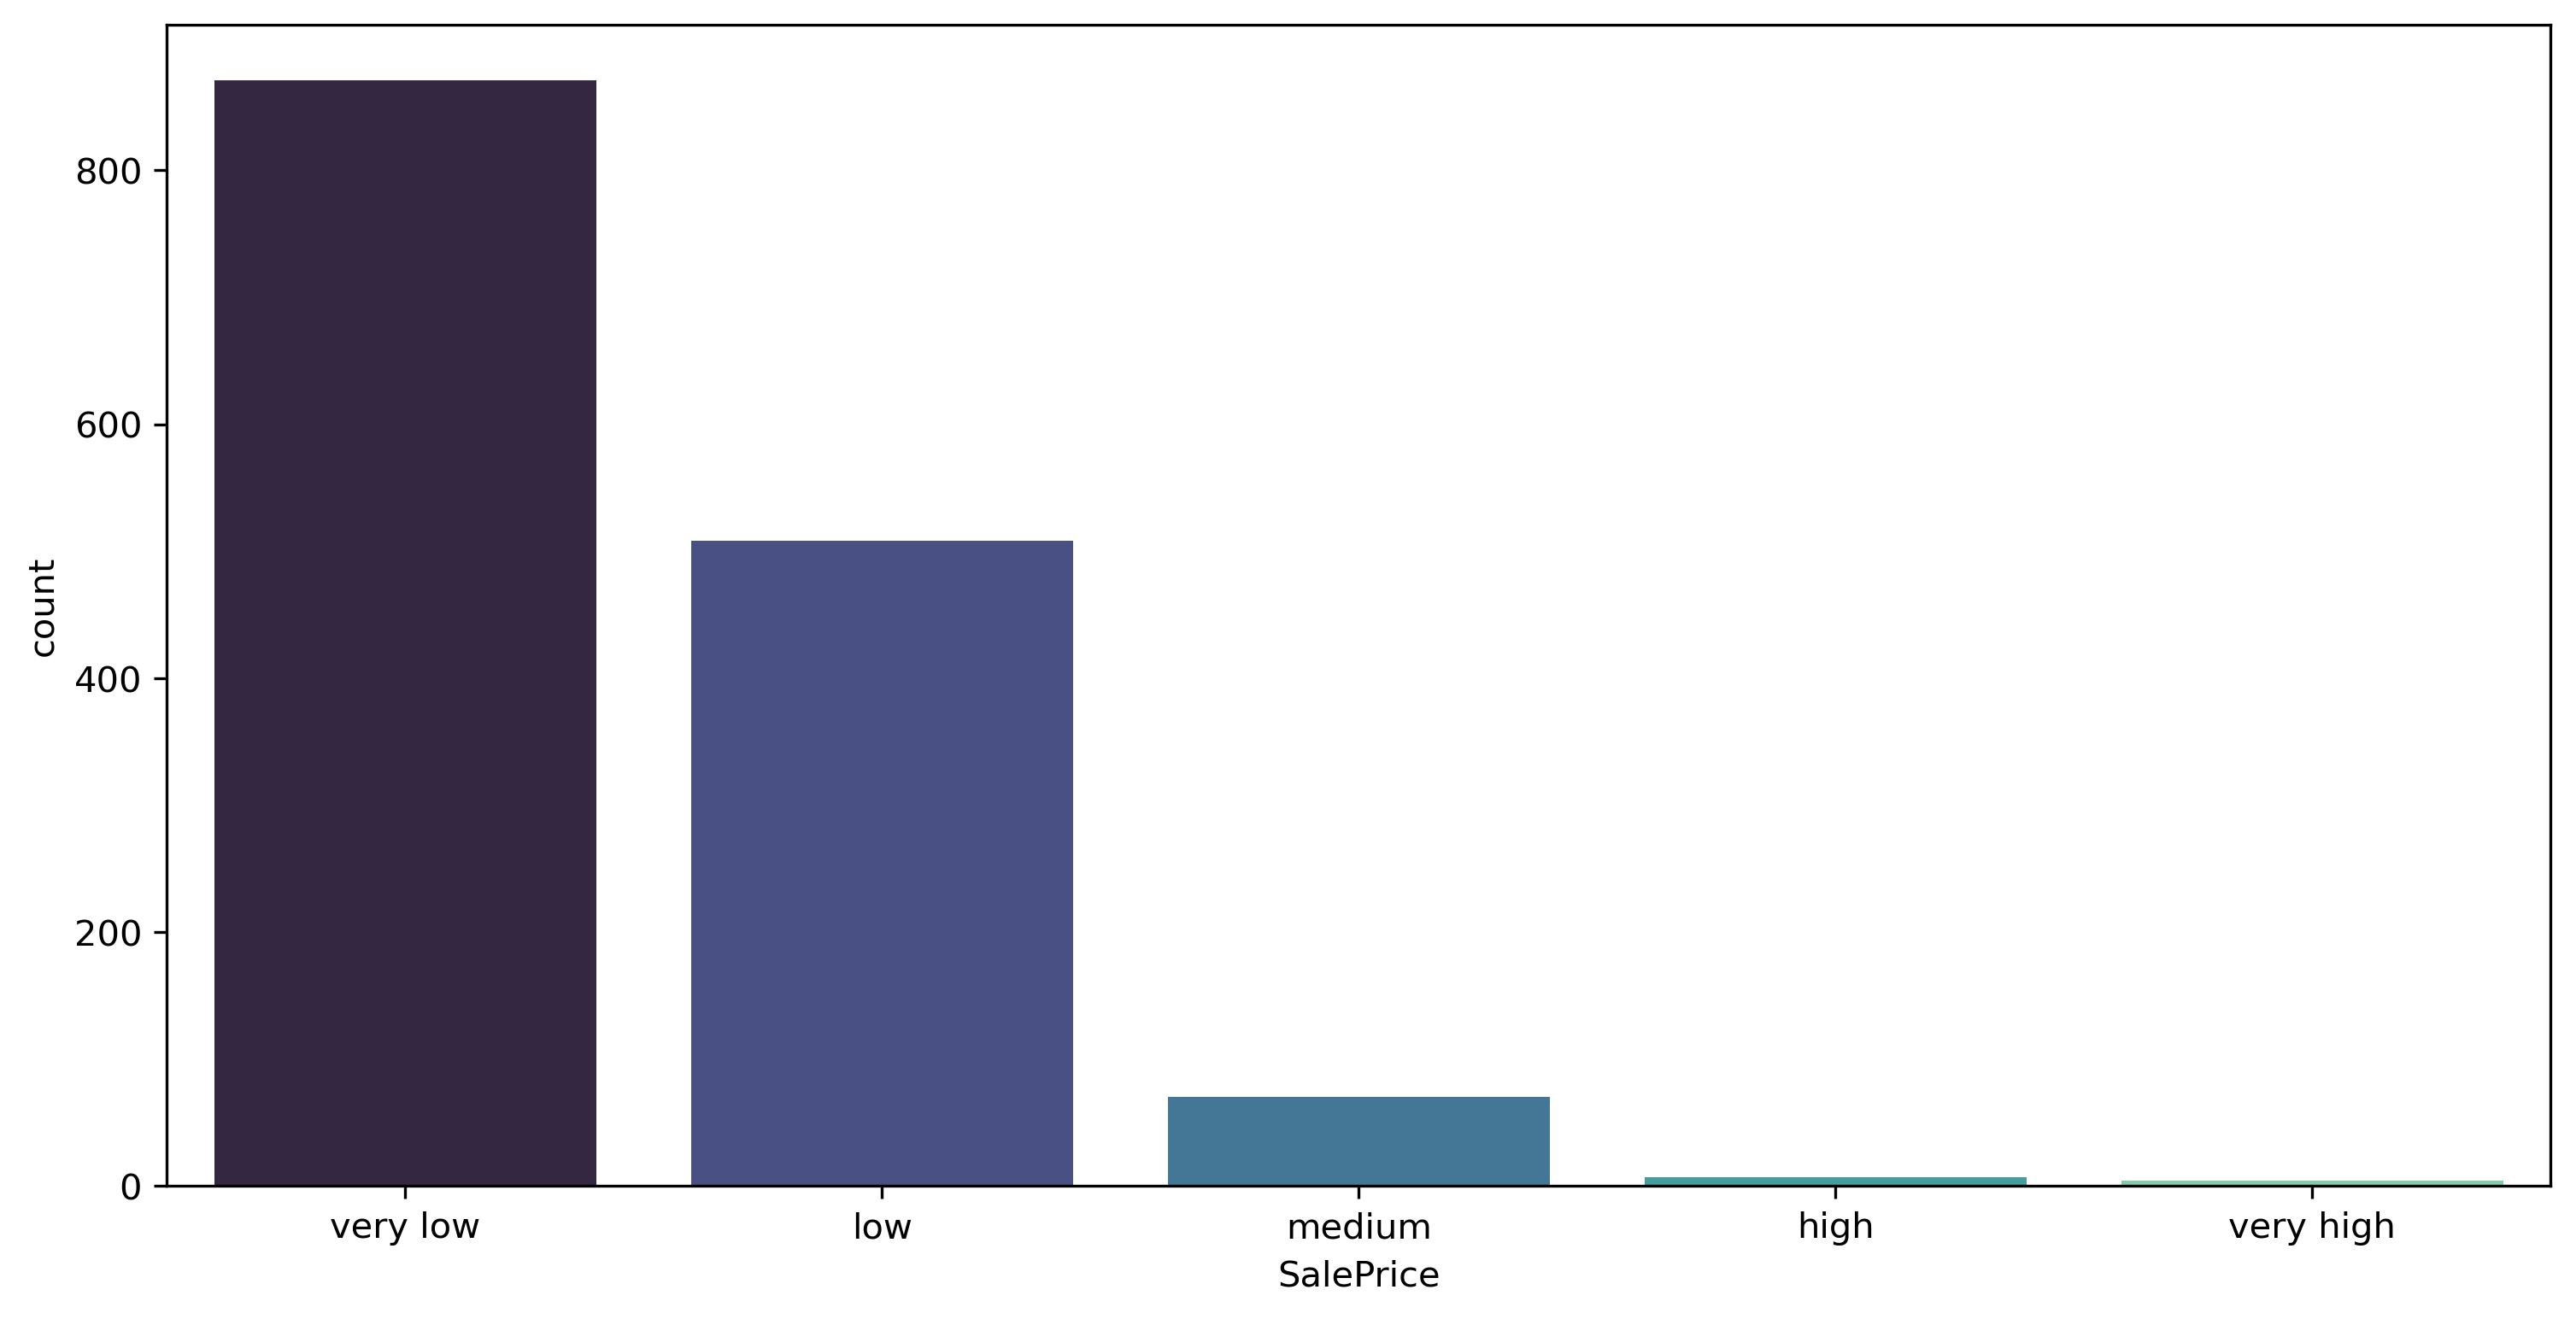

In [30]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=price_levels,palette='mako')
plt.show()